# 2D Vector Exercises

## Draw the point in the plane and the arrow corresponding to the point `(-2, 2)`

Note that `Points` constructor requires one or more `vector`s

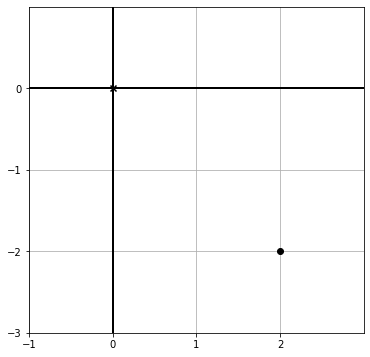

In [24]:
from vector_drawing import draw, Points, Arrow

point_coordinates = (2, -2)

draw(Points(point_coordinates))

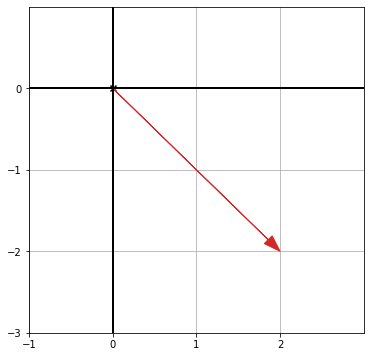

In [25]:
vector = Arrow(point_coordinates)

draw(vector)

## Draw the dinosaur from the following figure with the dots connected constructing a `Polygon` object instead of drawing the `Segment`s

When using `Polygon` the order of the points is also important

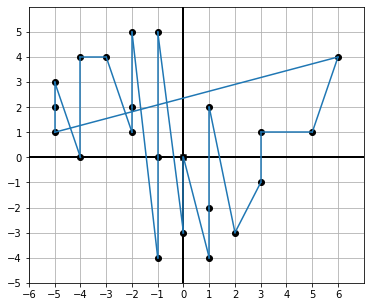

In [26]:
from vector_drawing import draw, Points, Polygon

dino_points = [(-5, 1), (-5, 2), (-5, 3), (-4, 0),
                (-4, 4), (-3, 4), (-2, 1), (-2, 2),
                (-2, 5), (-1, -4), (-1, 0), (-1, 5),
                (0, -3), (0, 0), (1, -4), (1, -2),
                (1, 2), (2, -3), (3, -1), (3, 1),
                (5, 1), (6, 4)]

draw(Points(*dino_points), Polygon(*dino_points))

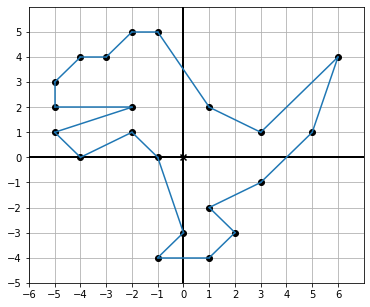

In [27]:
sorted_dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(Points(*sorted_dino_points), Polygon(*sorted_dino_points))

## Draw the vectors `(x, x ** 2)` for x in the range from x = -10 to x = 11 as points

Firstly using old-school approach (without comprehensions)

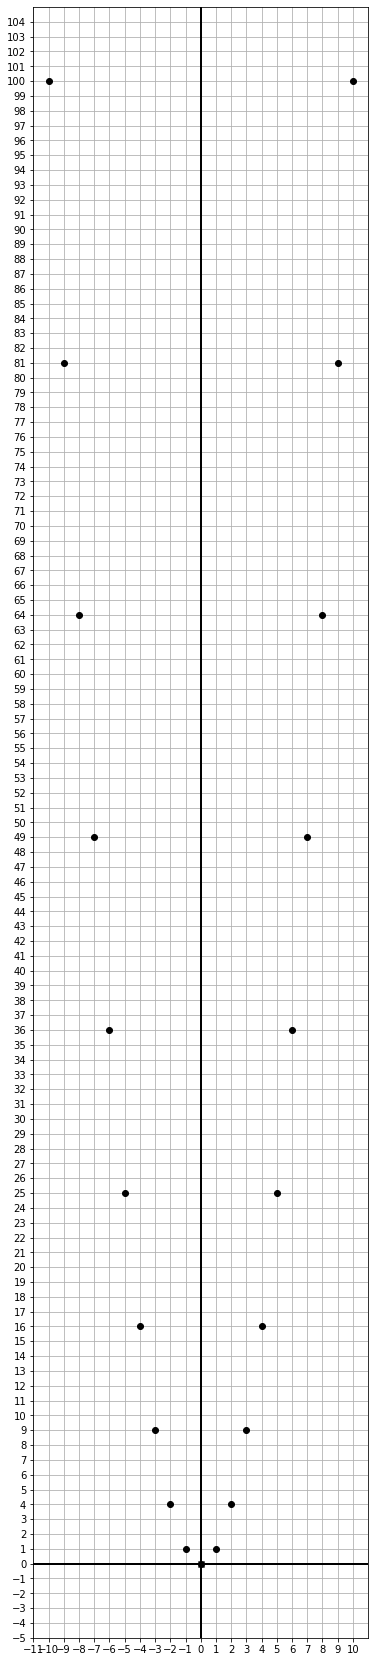

In [28]:
from vector_drawing import draw, Points
tuple_list = []

for x in range(-10, 11):
    tuple_list.append((x, x**2))
                  
draw(Points(*tuple_list))

The appearance can be fixed passing extra parameters to `draw(...)`:
+ `grid(1, 10)` &mdash; use one unit step for x-axis, ten for y-axis
+ `nice_aspect_ratio`&mdash; instructs draw not to keep the x-axis and y-axis scales the same

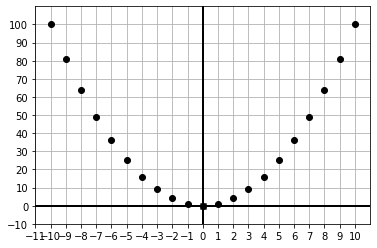

In [29]:
draw(Points(*tuple_list), grid=(1,10), nice_aspect_ratio=False )

And now using list comprehension to create the list of tuples representing the points for the chart

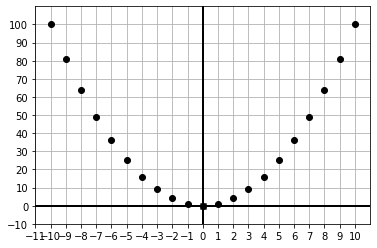

In [30]:
points = [(x, x**2) for x in range(-10, 11)]
draw(Points(*points), grid=(1, 10), nice_aspect_ratio=False)

## Calculate the results for the following operations

If the vector $ u = (-2, 0) $, the vector $ v = (1.5, 1.5) $, and the vector $ w = (4, 1) $:

$ 
u + v \\
v + w \\
u + w \\
u + v + w \\
$

In [31]:
def add(v1, v2, *vs):
    resulting_vector = (v1[0] + v2[0], v1[1] + v2[1])
    for v in vs:
        resulting_vector = (resulting_vector[0] + v[0], resulting_vector[1] + v[1])
    return resulting_vector

def print_result(msg, value):
    print('%s = %s' % (msg, value))

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print_result('u + v', add(u, v))
print_result('v + w', add(v, w))
print_result('u + w', add(u, w))
print_result('u + v + w', add(u, v, w))

u + v = (-0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)


## Implement a function `add(*vectors)` that can add any number of vectors together

I have already defined a function `add(v1, v2, *vs)` that can do exactly the same, but the implementation feels procedural.

The following implementation looks cleaner, as it makes use of collection functions.

Let's review the `sum(...)` function:

In [32]:
nums = [1, 2, 3, 4, 5]
print(sum(nums))

tuples_list=[(1, 2), (3, 4)]

# We use a list comprehension to put together the t[0] components in a list, and the t[1] components in another list
rearranged_list = [[t[0] for t in tuples_list], [t[1] for t in tuples_list]]
print(rearrangement_list)


15
[[1, 3], [2, 4]]


We can leverage `sum(...)` for a cleaner implementation:

In [33]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(add(u))
print(add(u, v))
print(add(u, v, w))

(-2, 0)
(-0.5, 1.5)
(3.5, 2.5)


In [34]:
## Write a function `translate(translation, vectors)` that takes a translation vector and a list of input vectors, and returns a list of the input vectors all *translated* by the translation vector.

Example:
`translate((1, 1), [(0, 0), (0, 1), (-3, -3)]) = [(1, 1), (1, 2)(-2, -2)]`

SyntaxError: invalid syntax (<ipython-input-34-bf6b9b2194bf>, line 3)

In [35]:
def translate(translation_vector, vectors):
    translated_vectors = []
    for v in vectors:
        translated_vector = (v[0] + translation_vector[0], v[1] + translation_vector[1])
        translated_vectors.append(translated_vector)
    return translated_vectors

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


A revised implementation, that looks cleaner using *list comprehensions*

In [36]:
def translate(translation_vector, vectors):
    return [(translation_vector[0] + v[0], translation_vector[1] + v[1]) for v in vectors]

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


And it can be even simplified a bit more, as at the end, *translation* is adding

In [37]:
def translate(translation_vector, vectors):
    return [add(translation_vector, v) for v in vectors]

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


## Any sum of vectors $ v + w $ gives the same result as $ w + v $. Explain why this is true using the definition of the vector sum on coordinates and also draw a picture to demonstrate it geometrically.

Let's assume $ v = (v_{x}, v_{y}) $ and $ w = (w_{x}, w_{y}) $.

As $ v + w = (v_{x} + w_{x}, v_{y} + w_{y}) $ and $ a + b = b + a $ (commutative property) then:

$ v + w = w + v $

Let's demonstrate it graphically in a example:

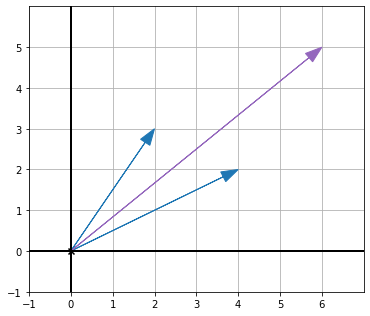

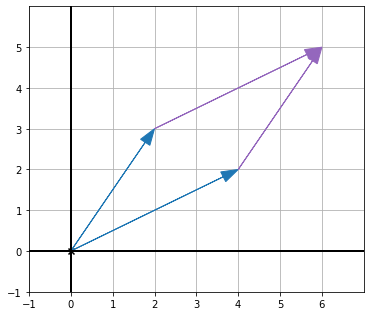

In [43]:
from vector_drawing import blue, purple, red

v = (4, 2)
w = (2, 3)

draw(
    Arrow(v, color=blue),
    Arrow(w, color=blue),
    Arrow(add(v, w), color=purple)
)

In [ ]:
It gets clearer using the *tip-to-tail* method

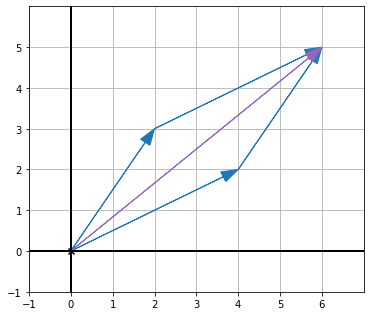

In [45]:

draw(
    Arrow(v, color=blue),
    Arrow(add(v, w), v, color=blue),
    Arrow(w, color=blue),
    Arrow(add(w, v), w, color=blue),
    Arrow(add(v, w), color=purple)
    )

Thus, the *sum vector* represents the diagonal of the parallelogram.

## Write a Python function using vector addition to display 100 simultaneous and non-overlapping copies of the dinosaur.

First of all let's draw the first copy of the dinosaur, using `draw(Polygon(...))`

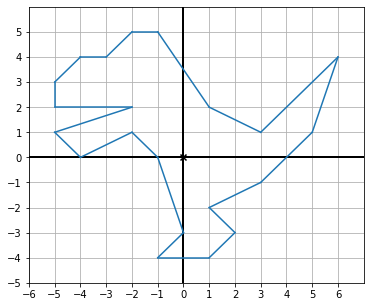

In [51]:
sorted_dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(Polygon(*sorted_dino_points))

Now, let's manually draw in a row 2 non-overlapping dinosaurs.

| NOTE: |
| :---- |
| The dinousaur length is the distance between the leftmost x coordinate, and the rightmost x coordinate |

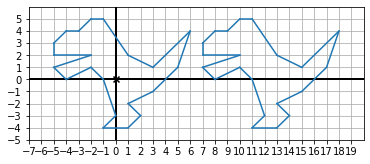

In [57]:
min_x = min([x[0] for x in sorted_dino_points])
max_x = max([x[0] for x in sorted_dino_points])
dino_length = max_x - min_x

translated_dino_points = [add((dino_length + 1, 0), v) for v in sorted_dino_points]

draw(
    Polygon(*sorted_dino_points),
    Polygon(*translated_dino_points)
)

Now we can automate it for 2 dinos

[[(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)], [(18, 4), (15, 1), (13, 2), (11, 5), (10, 5), (9, 4), (8, 4), (7, 3), (7, 2), (10, 2), (7, 1), (8, 0), (10, 1), (11, 0), (12, -3), (11, -4), (13, -4), (14, -3), (13, -2), (15, -1), (17, 1)]]
[<vector_drawing.Polygon object at 0x7f7db2747af0>, <vector_drawing.Polygon object at 0x7f7db275a2b0>]


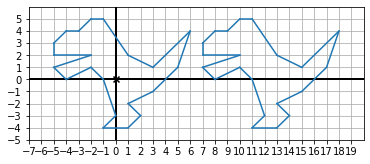

In [71]:
translated_dinos = [ [add(( (dino_length + 1) * i, 0), v) for v in sorted_dino_points] for i in range(0, 2)]
print(translated_dinos)


translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons)

Now we can draw the first line of 10 dinos

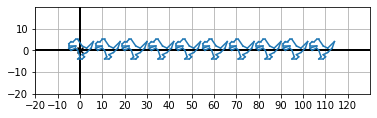

In [75]:
translated_dinos = [ [add(( (dino_length + 1) * i, 0), v) for v in sorted_dino_points] for i in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))

And now we can do similarly for different rows

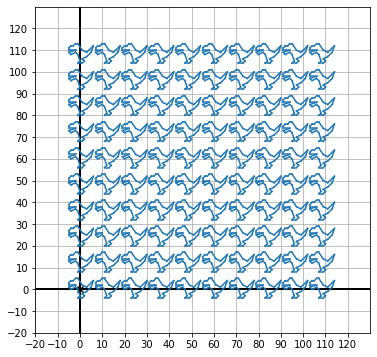

In [79]:
# I'm pretty sure this can optimized as I'm traversing the list of points 4 times!
min_x = min([x[0] for x in sorted_dino_points])
max_x = max([x[0] for x in sorted_dino_points])
dino_length = max_x - min_x

min_y = min([y[0] for y in sorted_dino_points])
max_y = max([y[0] for y in sorted_dino_points])
dino_height = max_y - min_y

translated_dinos = [ [add(( (dino_length + 1) * i, (dino_height + 1) * j), v) for v in sorted_dino_points] for i in range(0, 10) for j in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))


{'length': 11, 'height': 9}


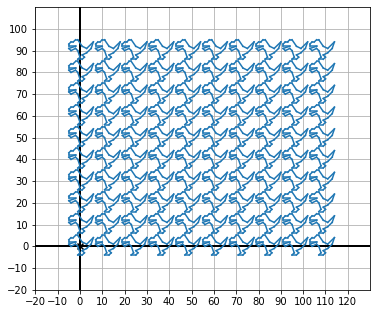

In [84]:
def get_shape_dimensions(*shape_points):
    min_x = float('inf')
    max_x = float('-inf')
    min_y = float('inf')
    max_y = float('-inf')
    for p in dino_points:
        min_x = p[0] if p[0] < min_x else min_x
        max_x = p[0] if p[0] > max_x else max_x
        min_y = p[1] if p[1] < min_y else min_y
        max_y = p[1] if p[1] > max_y else max_y
    return { "length": max_x - min_x, "height": max_y - min_y }

print(get_shape_dimensions(*sorted_dino_points))

dino_dimensions = get_shape_dimensions(*sorted_dino_points)
translated_dinos = [ [add(( (dino_dimensions["length"] + 1) * i, (dino_dimensions["height"] + 1) * j), v) for v in sorted_dino_points] for i in range(0, 10) for j in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))